In [ ]:
!pip install seaborn==0.9.0

In [ ]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170
...,...,...,...
2152,0,80,7518
2153,1,52,1332
2154,0,40,473
2155,0,75,5324


In [ ]:
mapa = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}

dados = dados.rename(columns=mapa)

In [ ]:
trocar = {
    0 : 1,
    1 : 0
}

dados['finalizado'] = dados.nao_finalizado.map(trocar)
dados

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0
...,...,...,...,...
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1


In [ ]:
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


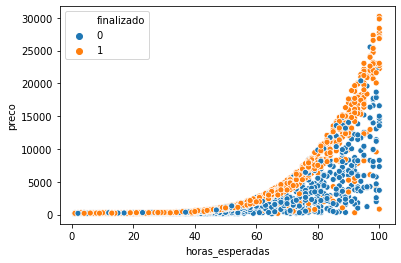

In [ ]:
import seaborn as sns

sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)

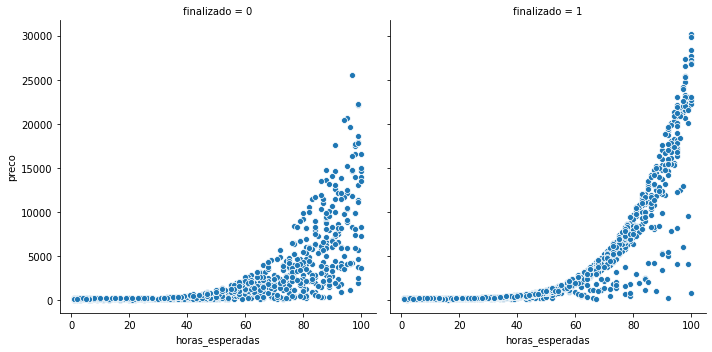

In [ ]:
sns.relplot(x="horas_esperadas", y="preco", col="finalizado", data=dados)

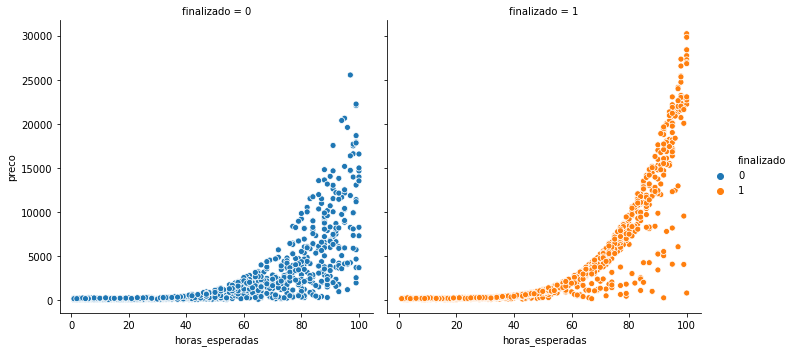

In [ ]:
sns.relplot(x="horas_esperadas", y="preco", col="finalizado", hue="finalizado" , data=dados)

In [ ]:
x = dados[['horas_esperadas', 'preco']]
y = dados[['finalizado']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%% \n\n" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 47.41% 




/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
import numpy as np
previsoes_de_base = np.ones(540)
#linha de base que deve ser vencida
acuracia = accuracy_score(teste_y, previsoes_de_base) * 100
print("A acurácia de baseline foi %.2f%% \n\n" % acuracia)

A acurácia de baseline foi 52.59% 




In [ ]:
sns.scatterplot(x="horas_esperadas", y="preco", hue=teste_y, data=teste_x) 

ValueError: ignored

In [ ]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max,y_min,y_max)

1 100 101 27738


In [ ]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_x

array([ 1.  ,  1.99,  2.98,  3.97,  4.96,  5.95,  6.94,  7.93,  8.92,
        9.91, 10.9 , 11.89, 12.88, 13.87, 14.86, 15.85, 16.84, 17.83,
       18.82, 19.81, 20.8 , 21.79, 22.78, 23.77, 24.76, 25.75, 26.74,
       27.73, 28.72, 29.71, 30.7 , 31.69, 32.68, 33.67, 34.66, 35.65,
       36.64, 37.63, 38.62, 39.61, 40.6 , 41.59, 42.58, 43.57, 44.56,
       45.55, 46.54, 47.53, 48.52, 49.51, 50.5 , 51.49, 52.48, 53.47,
       54.46, 55.45, 56.44, 57.43, 58.42, 59.41, 60.4 , 61.39, 62.38,
       63.37, 64.36, 65.35, 66.34, 67.33, 68.32, 69.31, 70.3 , 71.29,
       72.28, 73.27, 74.26, 75.25, 76.24, 77.23, 78.22, 79.21, 80.2 ,
       81.19, 82.18, 83.17, 84.16, 85.15, 86.14, 87.13, 88.12, 89.11,
       90.1 , 91.09, 92.08, 93.07, 94.06, 95.05, 96.04, 97.03, 98.02,
       99.01])

In [ ]:
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
xx, yy

(array([[ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
        [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
        [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
        ...,
        [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
        [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
        [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01]]),
 array([[  101.  ,   101.  ,   101.  , ...,   101.  ,   101.  ,   101.  ],
        [  377.37,   377.37,   377.37, ...,   377.37,   377.37,   377.37],
        [  653.74,   653.74,   653.74, ...,   653.74,   653.74,   653.74],
        ...,
        [26908.89, 26908.89, 26908.89, ..., 26908.89, 26908.89, 26908.89],
        [27185.26, 27185.26, 27185.26, ..., 27185.26, 27185.26, 27185.26],
        [27461.63, 27461.63, 27461.63, ..., 27461.63, 27461.63, 27461.63]]))

In [ ]:
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [ ]:
Z = modelo.predict(pontos)
Z.reshape(xx.shape)

array([0, 0, 0, ..., 0, 0, 0])

ValueError: ignored

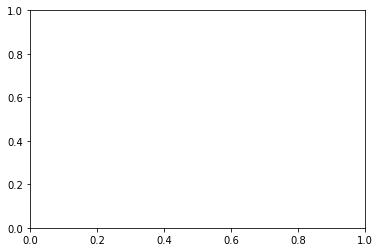

In [ ]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, s=1)